In [1]:
!pip install evaluate
!pip install rouge_score

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=64eb2ee45af6ec3ffe0f98cfddebff5c8ecaae7a383c6de88d7989edca7989ec
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [2]:
import torch
from transformers import AutoModelForCausalLM
from PIL import Image
import numpy as np
import os
import evaluate
import json
from transformers import AutoModelForCausalLM
from transformers import TrainingArguments, Trainer, logging
from datasets import load_dataset
from torch.utils.data import DataLoader

### Loading the saved model

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
from transformers import AutoProcessor
processor = AutoProcessor.from_pretrained("microsoft/git-base")

loaded_model =  AutoModelForCausalLM.from_pretrained("microsoft/git-base")
loaded_optimizer = torch.optim.AdamW(loaded_model.parameters(), lr=5e-5)

# Load the saved model and optimizer state
loaded_model.load_state_dict(torch.load(r'/content/drive/MyDrive/DS 5500 Capstone/Capstone (Shared)/Instagram Dataset FineTuned/finetuned_model_IGv1'))
loaded_optimizer.load_state_dict(torch.load(r'/content/drive/MyDrive/DS 5500 Capstone/Capstone (Shared)/Instagram Dataset FineTuned/optimizer_state_IGv1'))

# Set the model to evaluation mode for inference
loaded_model.eval()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/503 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.82k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/707M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

GitForCausalLM(
  (git): GitModel(
    (embeddings): GitEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(1024, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (image_encoder): GitVisionModel(
      (vision_model): GitVisionTransformer(
        (embeddings): GitVisionEmbeddings(
          (patch_embedding): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
          (position_embedding): Embedding(197, 768)
        )
        (pre_layrnorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (encoder): GitVisionEncoder(
          (layers): ModuleList(
            (0-11): 12 x GitVisionEncoderLayer(
              (self_attn): GitVisionAttention(
                (k_proj): Linear(in_features=768, out_features=768, bias=True)
                (v_proj): Linear(in_features=768, out_features=768, bias=True)
             

### Caption generation

In [6]:
#load instagram dataset from hugging face (takes around 5 min to load)
dataset = load_dataset('kkcosmos/instagram-images-with-captions', split = 'test', streaming = True)

dataset

IterableDataset({
    features: ['image', 'item_id', 'image_path', 'caption'],
    n_shards: 1
})

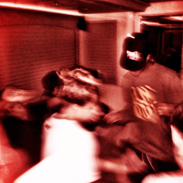

[CLS] [UNK] [SEP]


In [29]:
head = dataset.take(3)
example = list(head)[0]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

#device = "cuda" if torch.cuda.is_available() else "cpu"


inputs = processor(images=image, return_tensors="pt") #.to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=150)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
print(generated_caption)

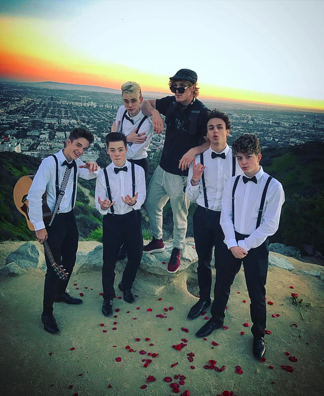

[CLS] [UNK] [SEP]


In [28]:
example = list(head)[1]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

#device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt") #.to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=150)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
print(generated_caption)

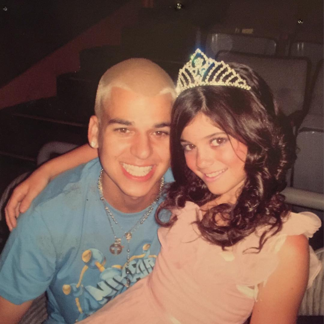

[CLS] [UNK] [SEP]


In [27]:
example = list(head)[2]
image = example["image"]
width, height = image.size
display(image.resize((int(0.3*width), int(0.3*height))))

#device = "cuda" if torch.cuda.is_available() else "cpu"

inputs = processor(images=image, return_tensors="pt") #.to(device)
pixel_values = inputs.pixel_values
generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=150)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=False)[0]
print(generated_caption)

# Evaluate all of the test set based on Rouge Score

In [22]:
rouge = evaluate.load('rouge')

In [33]:
from tqdm import tqdm
gen_cap = []
orig_cap = []
for row in tqdm(dataset):
  orig_cap.append(row['caption'])
  image = row['image']
  inputs = processor(images=image, return_tensors="pt") #.to(device)
  pixel_values = inputs.pixel_values
  generated_ids = loaded_model.generate(pixel_values=pixel_values, max_length=50)
  generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
  gen_cap.append(generated_caption)

3152it [2:12:28,  2.52s/it]


In [35]:
rouge.compute(predictions = gen_cap, references = orig_cap)

{'rouge1': 0.0020338931559631774,
 'rouge2': 0.0,
 'rougeL': 0.0019541199672395556,
 'rougeLsum': 0.001976778058584195}